# Getting data from Dukascopy

There are two steps involved in getting data from Dukascopy.

1. Download the data from www.dukascopy.com:
   This can be done in two ways:
   - Manual download:
     You can find more information in this Youtube video: https://youtu.be/RM54GNHmWk4?si=Yvyf4YV-3tJ0mifH
   - Download using Node.js:
     You can find more information in this Youtube video: https://youtu.be/lDhpsRY6-jI?si=WT1KArrnkeJ9rETL

2. Process the data from Dukascopy into a suitable Pandas DataFrame with a DateTime index. We are using daily data.

### Download data from Dukascopy

I used the Node.js Youtube video above and the dukascopy-node command line:
`
npx dukascopy-node -p ask -from 2008-01-01 -to 2024-07-31 --volumes --format csv -i eurusd
`

This downloaded the data into the `./download/` folder e.g. `./download/eurusd-d1-ask-2008-01-01-2024-07-31.csv`

<b>NOTE</b>: you can use your own data, just make sure to process it properly like we do below.

### Process the downloaded data

In [20]:
# IMPORT LIBRARIES

import os
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')

In [21]:
INSTRUMENT = 'eurusd'
FILEPATH_RAW = f'./download/{INSTRUMENT}-d1-ask-2008-01-01-2024-07-31.csv'
FILEPATH_PROCESSED = f'./ohlcv-data/{INSTRUMENT}.pkl'


# Read data into a pandas dataframe
df = pd.read_csv(FILEPATH_RAW, index_col="timestamp", parse_dates=True)
df.index = pd.to_datetime(df.index, unit='ms', utc=True)
df = df.sort_index()


# save the processed data for later use
os.makedirs(os.path.dirname(FILEPATH_PROCESSED), exist_ok=True)
df.to_pickle(FILEPATH_PROCESSED)

df.head()

,open,high,low,close,volume
timestamp,,,,,
2008-01-01 00:00:00+00:00,1.45857,1.46295,1.45737,1.46194,764380.6875
2008-01-02 00:00:00+00:00,1.46188,1.47510,1.45933,1.47160,767200.5625
2008-01-03 00:00:00+00:00,1.47158,1.47817,1.46853,1.47431,766503.1250
2008-01-04 00:00:00+00:00,1.47420,1.48257,1.46920,1.47407,716818.3125
2008-01-06 00:00:00+00:00,1.47521,1.47570,1.47409,1.47492,68230.1875


### Plot the candlesticks

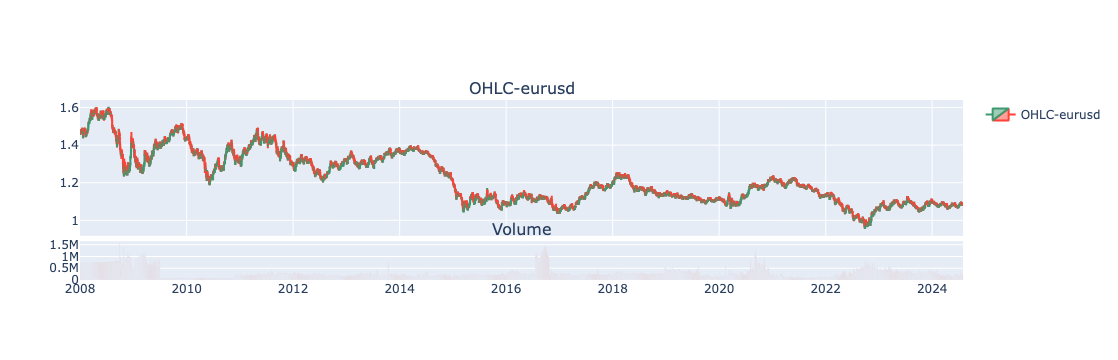

In [23]:
# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    vertical_spacing=0.03, subplot_titles=(f'OHLC-{INSTRUMENT}', 'Volume',),
                    row_width=[0.2, 0.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=df.index, open=df["open"], high=df["high"], low=df["low"], close=df["close"], name=f'OHLC-{INSTRUMENT}'),row=1, col=1)

# Bar trace for volumes on 2nd row without legend
fig.add_trace(go.Bar(x=df.index, y=df['volume'], showlegend=False), row=2, col=1)

# Do not show OHLC's rangeslider plot
fig.update(layout_xaxis_rangeslider_visible=False)